## Comparação Entre Modelos

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns 
from statsmodels.tools.eval_measures import rmse
import warnings
from shutil import copy2
%matplotlib inline

# Matplotlib options
rcParams['figure.figsize'] = (10, 8)
rcParams['axes.grid'] = False
plt.style.use('seaborn-deep')

# Pandas setup
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000) 
pd.set_option('display.max_colwidth', -1) 
warnings.filterwarnings('ignore')

In [2]:
path = './models/forecasts/dataframe'
entities = ['p1', 'p2']
words = [
  'COLIFORMES_TERMOTOLERANTES', 
  'DQO', 
  'FÓSFORO', 
  'NITROGÊNIO', 
  'DBO', 
  'PH', 
  'SURFACTANTES', 
  'SÓLIDOS', 
  'ÓLEOS', 
  'COR_VERDADEIRA'
]

In [3]:
entity = entities[1]
word = words[8]

validation = pd.read_csv(
    './datasets/' + entity + "_validation.csv", 
    encoding='utf8', 
    parse_dates=True, 
    index_col="DATE"
)
true_values = validation[word]
forecasts = pd.read_csv(f'{path}/{entity}_{word}.csv', index_col='DATE', parse_dates=True)
forecasts['TRUE_VALUES'] = true_values
arima = forecasts['ARIMA']
ets = forecasts['ETS']
prophet = forecasts['PROPHET']

In [4]:
copy2("comparison.ipynb", f"./comparison_review/{entity}/{word}.ipynb")

'./comparison_review/p2/ÓLEOS.ipynb'

In [5]:
def get_rmse(arima, ets, prophet, true_values):
    score = pd.DataFrame({
        "RMSE": [
            rmse(arima, true_values),
            rmse(ets, true_values),
            rmse(prophet, true_values)
        ]
    }, index=["arima", "ets", "prophet"])
    score = score.sort_values("RMSE")

    return score


def plot_forecasts(arima, ets, prophet, true_values):
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, color="orange", label="Valores verdadeiros")
    plt.plot(arima, color="red", linestyle="--", label="SARIMA")
    plt.plot(prophet, color="royalblue", linestyle="--", label="Prophet")
    plt.plot(ets, color="green", linestyle="--", label="ETS")
    plt.title(f"Comparação Entre Previsões de {word}")
    plt.legend(loc="upper left");


def plot_residuals(model_name, true_values):
    residuals =  eval(model_name) - true_values
    plt.figure(figsize=(8, 4))
    plt.plot(residuals)
    plt.axhline(0, color="black")
    plt.title(f"Residuais de {model_name.upper()}");

## Comparação 3 Meses

In [6]:
arima_3m = arima.iloc[0:3]
ets_3m = ets.iloc[0:3]
prophet_3m = prophet.iloc[0:3]
true_values_3m = true_values.iloc[0:3]

score_3m = get_rmse(arima_3m, ets_3m, prophet_3m, true_values_3m)
score_3m

,RMSE
ets,1.702182
arima,2.072458
prophet,3.023739


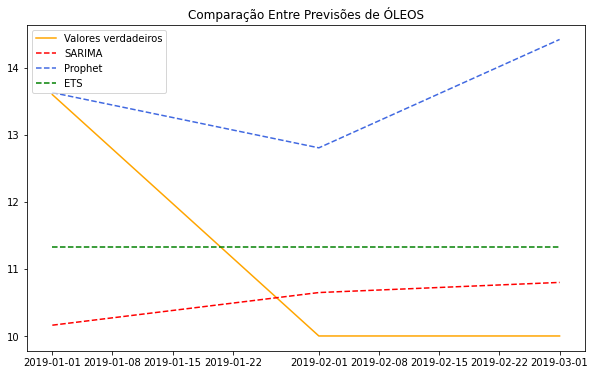

In [7]:
plot_forecasts(arima_3m, ets_3m, prophet_3m, true_values_3m)

## Comparação 12 Meses

In [8]:
score = get_rmse(arima, ets, prophet, true_values)
score

,RMSE
ets,2.764845
arima,3.097728
prophet,3.868692


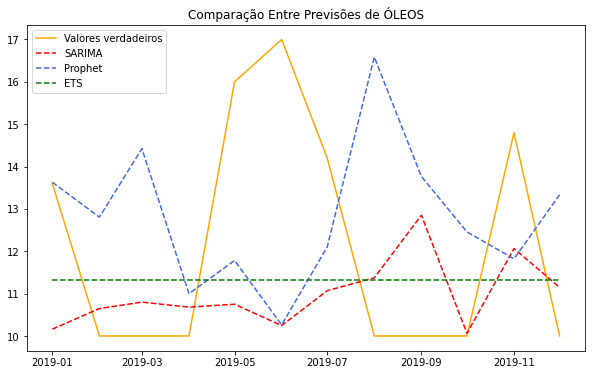

In [9]:
plot_forecasts(arima, ets, prophet, true_values)

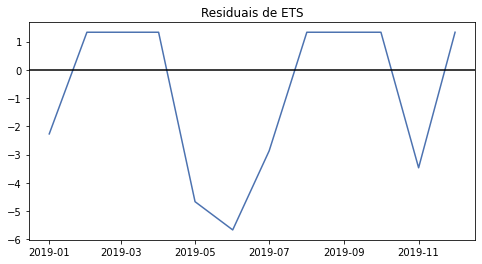

In [10]:
model_name = score.index[0]
plot_residuals(model_name, true_values)

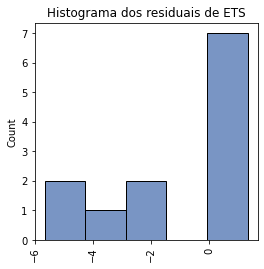

In [11]:
residuals =  eval(model_name) - true_values
plt.figure(figsize=(4, 4))
plt.xticks(rotation=90)
plt.xlabel("")
plt.title(f"Histograma dos residuais de {model_name.upper()}")
sns.histplot(residuals);